# Day 3

## Part 1

- The missing engine part is the sum of all the part numbers in the schematic.
- Any number adjacent to a symbol (diagonal too) is a part number

In [24]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)

Text(0.5, 1.0, "Let's see what the problem is...")

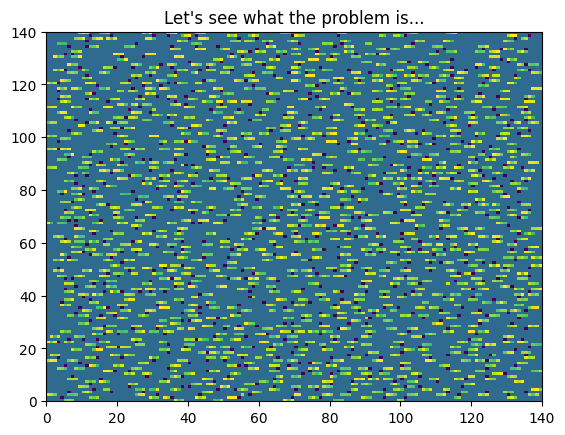

In [20]:
# first let's see what we're dealing with
def cast_input(character: str) -> int|str|None:
    """converts the puzzle input to more parsable types"""
    if character == '.':
        return -10
    try:
        return int(character)
    except ValueError:
        return -20

parser = ParseConfig('\n', ParseConfig('', cast_input))

plot_input = parse_from_file('puzzle_input\\day_3.txt', parser)

fig, ax = plt.subplots()
ax.pcolormesh(np.flipud(np.array(plot_input)))
ax.set_title('Let\'s see what the problem is...')

In [21]:
def cast_input(character: str) -> int|str|None:
    """converts the puzzle input to more parsable types"""
    if character == '.':
        return None
    try:
        return int(character)
    except ValueError:
        return character

parser = ParseConfig('\n', ParseConfig('', cast_input))

grid_input = parse_from_file('puzzle_input\\day_3.txt', parser)

In [25]:
# get the coordinates of all the symbols
symbol_coords = []
for y, row in tqdm(enumerate(grid_input)):
    for x, value in enumerate(row):
        if isinstance(value, str):
            symbol_coords.append((y, x))

140it [00:00, 15541.45it/s]


In [49]:
# find coords of adjacent numbers
digit_coords = []
for y, x in tqdm(symbol_coords):
    for dy in (-1, 0, 1):
        for dx in (-1, 0, 1):
            cx, cy = x + dx, y + dy
            if isinstance(grid_input[cy][cx], int):
                digit_coords.append((cy, cx))
            

100%|██████████| 731/731 [00:00<00:00, 88711.19it/s]


In [50]:
# scoop up the numbers
total_part_number = 0
already_counted = []
for y, x in tqdm(digit_coords):
    start = x
    while start >= 0:
        if isinstance(grid_input[y][start], int):
            start -= 1
        else:
            break
    char_x = start + 1
    if (y, char_x) in already_counted:
        continue
    already_counted.append((y, char_x))

    number_string = ''
    while char_x < len(grid_input[y]):
        value = grid_input[y][char_x]
        if isinstance(value, int):
            number_string += str(value)
        else:
            break
        char_x += 1

    total_part_number += int(number_string)


100%|██████████| 1691/1691 [00:00<00:00, 38736.67it/s]


In [51]:
markdown(
    '### Solution',
    f'The sum of all the part numbers is: {total_part_number}'
)

### Solution
The sum of all the part numbers is: 520135